# IMPORTING NECESSARY LIBRARIES


In [58]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# READ AND LOAD DATASET

In [2]:
cotweets = pd.read_csv("C:/Users/abc/Downloads/CoronaTweetsSentimentAnalysis.csv")
cotweets.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive
5,6,44971,NaN,05-03-2020,That's about a week from now. A bit optimistic...,Positive
6,7,44973,Malta,05-03-2020,#CoronaVirus #COVID_19 People are starting to ...,Negative
7,8,44978,"Wayne County, MI",07-03-2020,Alright yall I hope our Melanin prevails but ...,Positive
8,9,44979,"Bondi Beach, Sydney",07-03-2020,When your usual grocery shopping @woolworths t...,Negative
9,10,44980,NaN,07-03-2020,Coronavirus panic spreads: Costco is pulling f...,Negative


# PREPROCESSING TECHNIQUES

In [3]:
cotweets.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [4]:
cotweets. shape

(1988, 6)

In [5]:
cotweets.info

<bound method DataFrame.info of       UserName  ScreenName                Location     TweetAt  \
0            1       44954             Seattle, WA  02-03-2020   
1            2       44956             Chicagoland  02-03-2020   
2            3       44959                     NaN  03-03-2020   
3            4       44963  Boksburg, South Africa  04-03-2020   
4            5       44967          Washington, DC  04-03-2020   
...        ...         ...                     ...         ...   
1983      1984       48737       Paraparaumu Beach  16-03-2020   
1984      1985       48743        Cincinnati, Ohio  16-03-2020   
1985      1986       48745         Washington D.C.  16-03-2020   
1986      1987       48746               Israel ??  16-03-2020   
1987      1988       48747          Farmington, NM  16-03-2020   

                                          OriginalTweet Sentiment  
0     When I couldn't find hand sanitizer at Fred Me...  Positive  
1     #Panic buying hits #NewYork City 

In [6]:
cotweets.describe

<bound method NDFrame.describe of       UserName  ScreenName                Location     TweetAt  \
0            1       44954             Seattle, WA  02-03-2020   
1            2       44956             Chicagoland  02-03-2020   
2            3       44959                     NaN  03-03-2020   
3            4       44963  Boksburg, South Africa  04-03-2020   
4            5       44967          Washington, DC  04-03-2020   
...        ...         ...                     ...         ...   
1983      1984       48737       Paraparaumu Beach  16-03-2020   
1984      1985       48743        Cincinnati, Ohio  16-03-2020   
1985      1986       48745         Washington D.C.  16-03-2020   
1986      1987       48746               Israel ??  16-03-2020   
1987      1988       48747          Farmington, NM  16-03-2020   

                                          OriginalTweet Sentiment  
0     When I couldn't find hand sanitizer at Fred Me...  Positive  
1     #Panic buying hits #NewYork Cit

In [8]:
cotweets['Location'].value_counts()

United States           42
London, England         25
Washington, DC          22
New York, NY            20
Los Angeles, CA         16
                        ..
Tulalip, WA              1
Ayr, Scotland            1
Melbourne, Australia     1
Gilbert, AZ              1
Lake Wildwood, CA        1
Name: Location, Length: 1019, dtype: int64

In [9]:
cotweets.duplicated(subset='ScreenName').sum() # Check for duplicate values


0

In [10]:
cotweets.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [9]:
#dropping unwanted columns
to_drop = ['TweetAt','UserName']
cotweets.drop(to_drop, inplace=True, axis=1)
print("\nAFTER DROPPING UNWANTED COLUMNS FROM THE DATASET :")
cotweets.head()


AFTER DROPPING UNWANTED COLUMNS FROM THE DATASET :


,ScreenName,Location,OriginalTweet,Sentiment
0,44954,"Seattle, WA",When I couldn't find hand sanitizer at Fred Me...,Positive
1,44956,Chicagoland,#Panic buying hits #NewYork City as anxious sh...,Negative
2,44959,NaN,Voting in the age of #coronavirus = hand sanit...,Positive
3,44963,"Boksburg, South Africa",Best quality couches at unbelievably low price...,Positive
4,44967,"Washington, DC",While we were busy watching election returns a...,Positive


In [13]:
#missing values percent per column
print("\nMISSING VALUES IN EACH COLUMN :")
print(cotweets.isnull().sum())


MISSING VALUES IN EACH COLUMN :
UserName           0
ScreenName         0
Location         452
OriginalTweet      0
Sentiment          0
dtype: int64


In [14]:
#ensuring there is no missing values
print("\nAFTER REPLACING THE MISSING COLUMNS INTO A SINGLE CATEGORY :")
print(cotweets.isnull().sum())


AFTER REPLACING THE MISSING COLUMNS INTO A SINGLE CATEGORY :
UserName           0
ScreenName         0
Location         452
OriginalTweet      0
Sentiment          0
dtype: int64


In [15]:
np.sum(cotweets.isnull().any(axis=1))

452

In [17]:
cotweets = cotweets.fillna(" ")

In [18]:
np.sum(cotweets.isnull().any(axis=1))

0

In [52]:
cotweets['ScreenName'].unique()

array([44954, 44956, 44959, ..., 48745, 48746, 48747], dtype=int64)

In [53]:
cotweets.isna().any() # Check for "NaN" values again


ScreenName    False
Sentiment     False
dtype: bool

In [45]:
cotweets=cotweets.dropna()
cotweets

,OriginalTweet,Sentiment
0,when i couldnt find hand sanitizer at fred mey...,Positive
1,panic buying hits newyork city as anxious shop...,Negative
2,voting in the age of coronavirus hand sanitiz...,Positive
3,best quality couches at unbelievably low price...,Positive
4,while we were busy watching election returns a...,Positive
...,...,...
1983,just been through kpiti new world which is bus...,Positive
1984,even though the law library is closed all subs...,Positive
1985,ricepolitics mdcounties craig will you call on...,Negative
1986,meanwhile in a supermarket in israel people d...,Positive


In [46]:
#removing the punctuations 
import string

def punctuation_removal(OriginalTweet):
    all_list = [char for char in OriginalTweet if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

cotweets['OriginalTweet'] = cotweets['OriginalTweet'].apply(punctuation_removal)
cotweets.head()

,OriginalTweet,Sentiment
0,when i couldnt find hand sanitizer at fred mey...,Positive
1,panic buying hits newyork city as anxious shop...,Negative
2,voting in the age of coronavirus hand sanitiz...,Positive
3,best quality couches at unbelievably low price...,Positive
4,while we were busy watching election returns a...,Positive


In [47]:
#converting into lowercase
def convert_lowercase(sent):
    sent=sent.lower()
    return sent
cotweets['OriginalTweet']=cotweets['OriginalTweet'].apply(convert_lowercase)
cotweets.head()

,OriginalTweet,Sentiment
0,when i couldnt find hand sanitizer at fred mey...,Positive
1,panic buying hits newyork city as anxious shop...,Negative
2,voting in the age of coronavirus hand sanitiz...,Positive
3,best quality couches at unbelievably low price...,Positive
4,while we were busy watching election returns a...,Positive


In [49]:
#Replacing the links into ''
for m in cotweets:
    url = m[0]
    cotweets = cotweets.replace(url, '')
    print(cotweets)

                                          OriginalTweet Sentiment
0     when i couldnt find hand sanitizer at fred mey...  Positive
1     panic buying hits newyork city as anxious shop...  Negative
2     voting in the age of coronavirus  hand sanitiz...  Positive
3     best quality couches at unbelievably low price...  Positive
4     while we were busy watching election returns a...  Positive
...                                                 ...       ...
1983  just been through kpiti new world which is bus...  Positive
1984  even though the law library is closed all subs...  Positive
1985  ricepolitics mdcounties craig will you call on...  Negative
1986  meanwhile in a supermarket in israel  people d...  Positive
1987  did you panic buy a lot of nonperishable items...  Negative

[1988 rows x 2 columns]
                                          OriginalTweet Sentiment
0     when i couldnt find hand sanitizer at fred mey...  Positive
1     panic buying hits newyork city as anxious sho

In [50]:
cotweets = cotweets[['OriginalTweet','Sentiment']]

print(cotweets.shape)
cotweets.head(9)

(1988, 2)


,OriginalTweet,Sentiment
0,when i couldnt find hand sanitizer at fred mey...,Positive
1,panic buying hits newyork city as anxious shop...,Negative
2,voting in the age of coronavirus hand sanitiz...,Positive
3,best quality couches at unbelievably low price...,Positive
4,while we were busy watching election returns a...,Positive
5,thats about a week from now a bit optimistic ...,Positive
6,coronavirus covid19 people are starting to bec...,Negative
7,alright yall i hope our melanin prevails but ...,Positive
8,when your usual grocery shopping woolworths tu...,Negative


In [51]:
data=cotweets[['Sentiment','OriginalTweet']]

In [52]:
data['ScreenName'] = data['OriginalTweet'].replace(4,1)

C:\Users\abc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
data['OriginalTweet'].unique()

array(['when i couldnt find hand sanitizer at fred meyer i turned to amazon but 11497 for a 2 pack of purellcheck out how  coronavirus concerns are driving up prices httpstcoygbipbflmy',
       'panic buying hits newyork city as anxious shoppers stock up on foodampmedical supplies after healthcare worker in her 30s becomes bigapple 1st confirmed coronavirus patient or a bloomberg staged event\r\r\n\r\r\nhttpstcoiasiregpc4\r\r\n\r\r\nqanon qanon2018 qanon2020 \r\r\nelection2020 cdc httpstco29iszoewxu',
       'voting in the age of coronavirus  hand sanitizer  supertuesday httpstcoz0bel4o6dk',
       ...,
       'ricepolitics mdcounties craig will you call on the general assembly to enact a legal stay against debt collection activities now that thousands of marylanders are without a paycheck \r\r\n\r\r\nhttpstco6jkuoojxvn',
       'meanwhile in a supermarket in israel  people dance and sing together to stay positive  coronavirus httpstcovllqgi3r16',
       'did you panic buy a lot of non

# CORRELATION MATRIX


THE CORRELATION MATRIX :
            UserName  ScreenName
UserName    1.000000    0.999843
ScreenName  0.999843    1.000000

THE CORRELATION HEATMAP :


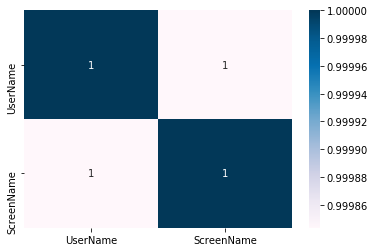

In [21]:
#the correlation matrix
print("\nTHE CORRELATION MATRIX :")
print(cotweets_df.corr())
print("\nTHE CORRELATION HEATMAP :")
sns.heatmap(cotweets_df.corr(),cmap="PuBu",annot=True)

# DATA VISUALIZATION

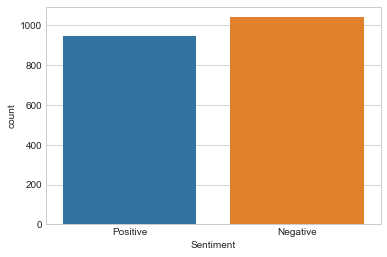

In [24]:
import seaborn as sns
sns.countplot(x='Sentiment', data=cotweets)

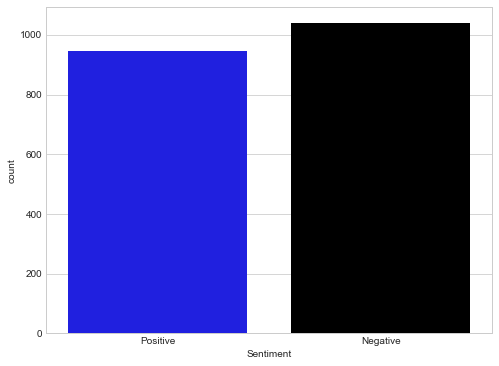

In [23]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))
col = ['blue', 'black']
ax = sns.countplot(x="Sentiment", data=cotweets, palette = col)

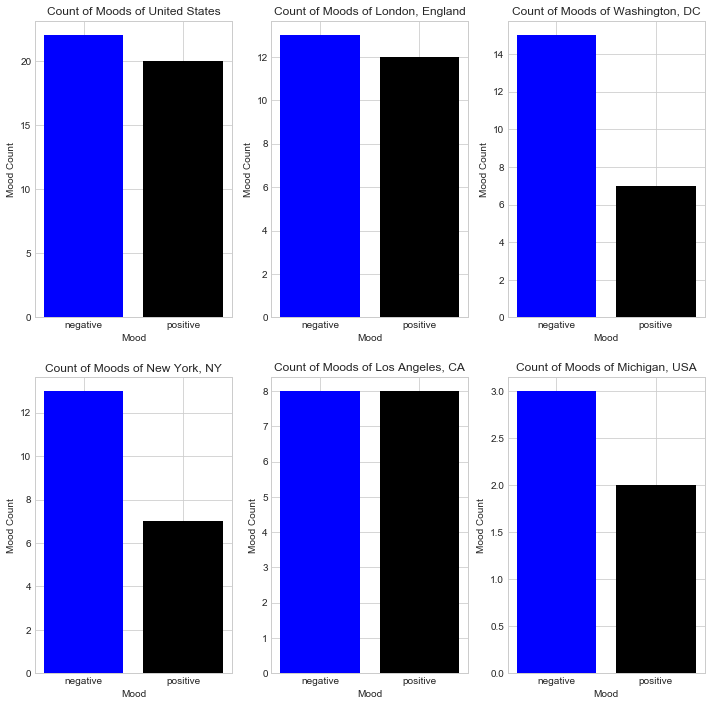

In [34]:
## taking TOP 5 Location for better Visulaization of tweet sentiments
location= ['United States','London, England','Washington, DC','New York, NY','Los Angeles, CA','Michigan, USA']
plt.figure(1,figsize=(12, 12))
for i in location:
    indices= location.index(i)
    plt.subplot(2,3,indices+1)
    new_df=cotweets[cotweets['Location']==i]
    count=new_df['Sentiment'].value_counts()
    Index = [1,2]
    plt.bar(Index,count, color=['blue', 'black'])
    plt.xticks(Index,['negative','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

# Splitting our data into Train and Test Subset

In [66]:
X=cotweets['OriginalTweet']
y=cotweets['Sentiment']
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)


# TF-IDF Vectorizer

In [68]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  45896


In [69]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


# MODEL EVALUATION

In [107]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'BrBG',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':10}, labelpad = 8)
    plt.ylabel("Actual values" , fontdict = {'size':10}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':14}, pad = 18)

              precision    recall  f1-score   support

    Negative       0.64      0.90      0.75        59
    Positive       0.65      0.27      0.38        41

    accuracy                           0.64       100
   macro avg       0.64      0.58      0.56       100
weighted avg       0.64      0.64      0.60       100



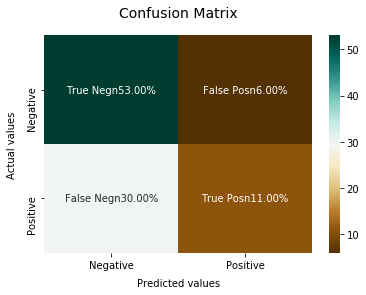

In [112]:
#Fitting the naive bayes model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

    Negative       0.72      0.69      0.71        59
    Positive       0.58      0.61      0.60        41

    accuracy                           0.66       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.66      0.66      0.66       100



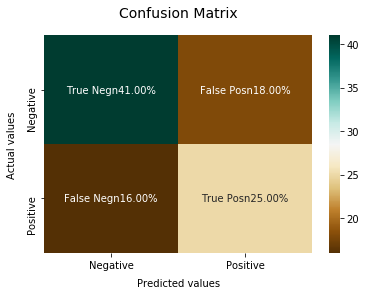

In [109]:
#fitting the support vector machine model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

    Negative       0.69      0.68      0.68        59
    Positive       0.55      0.56      0.55        41

    accuracy                           0.63       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.63      0.63      0.63       100



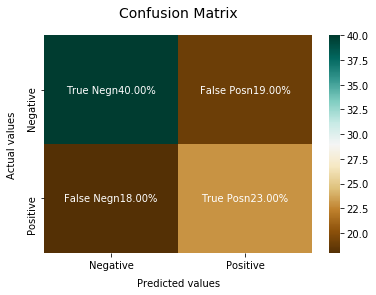

In [110]:
#Fitting the logistic Regression model
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

Summary :
    
    I have used confusion matrix for the classification report.
    Then, I have fitted Naive Bayes, Support vector machine and logistic regrssion 
    Accuracy score :
    naive bayes is 90%
    Support vector machine is 69%
    Logistic Regression is 68%
    
    I conclude that the naive bayes is the bestest model for the given dataset